In [7]:
# Import of libraries

# System libraries
import re
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization# Machine learning
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity



# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
# Machine learning
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv(r"C:\Users\nisha\Downloads\spotify_songs.csv\spotify_songs.csv")

In [11]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [22]:
data=df.copy()

# EDA

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'pop'),
  Text(0, 1, 'latin'),
  Text(0, 2, 'rap'),
  Text(0, 3, 'rock'),
  Text(0, 4, 'r&b'),
  Text(0, 5, 'edm')])

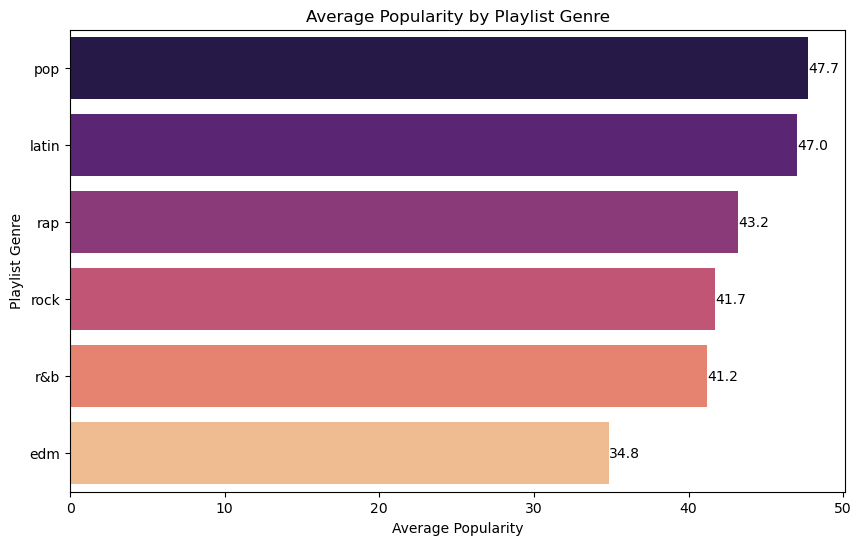

In [31]:
playlist_popularity=data.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=playlist_popularity.values , y=playlist_popularity.index, palette='magma')
#adding labels
for index,value in enumerate(playlist_popularity.values):
    plt.text(value,index,f'{value:.1f}',va='center', ha='left', color='black') # va vertical allingnment , ha , horizontal allignment
plt.title('Average Popularity by Playlist Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Playlist Genre')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

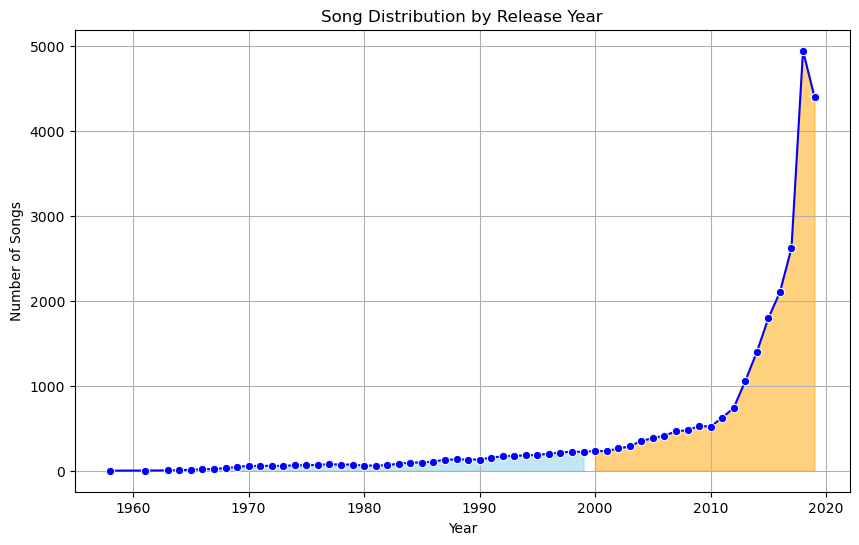

In [49]:
data['year']=pd.to_datetime(data['track_album_release_date'], errors='coerce').dt.year
yearly_tracks=data['year'].value_counts().sort_index()
# Removing the most recent year if it's incomplete
yearly_tracks = yearly_tracks[yearly_tracks.index < 2023]  # Adjust the year based on your dataset
# Smoothing the trend with a rolling average
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()  ## smmothening is use to plot points 
#yearly_tracks: A time series (e.g., DataFrame or Series indexed by year).

#.rolling(window=3): Creates a moving window of size 3.

#center=True: Centers the window, so the average is assigned to the middle value (not the end).

#.mean(): Computes the average of each window.
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Song Distribution by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)

# Color coding different eras
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index < 2000, color='skyblue', alpha=0.5)
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index >= 2000, color='orange', alpha=0.5)

plt.show()


Text(0, 0.5, 'Average Popularity')

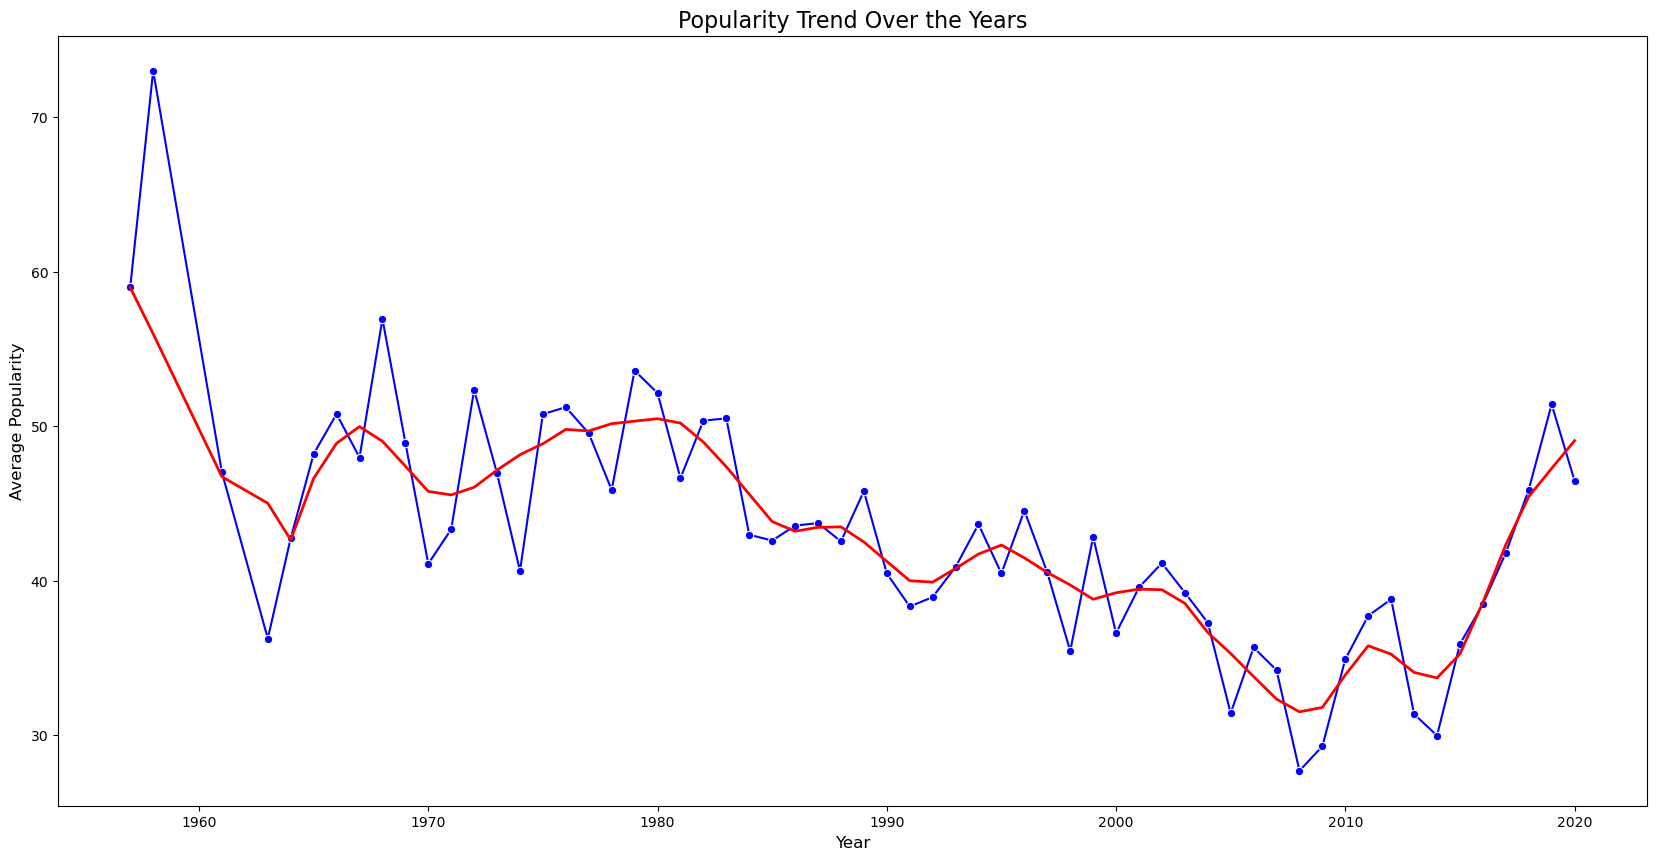

In [53]:
from statsmodels.nonparametric.smoothers_lowess import lowess


# Calculate the average popularity for each year
yearly_popularity = data.groupby('year')['track_popularity'].mean()

# Calculate smoothed trend line
# Smooth with 3-year moving average
smoothed = lowess(yearly_popularity.values, yearly_popularity.index, frac=0.1)


plt.figure(figsize=(20.5, 10))
sns.lineplot(x=yearly_popularity.index, y=yearly_popularity.values, marker='o', color='blue')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', lw=2, label='Smoothed Trend')
plt.title('Popularity Trend Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)

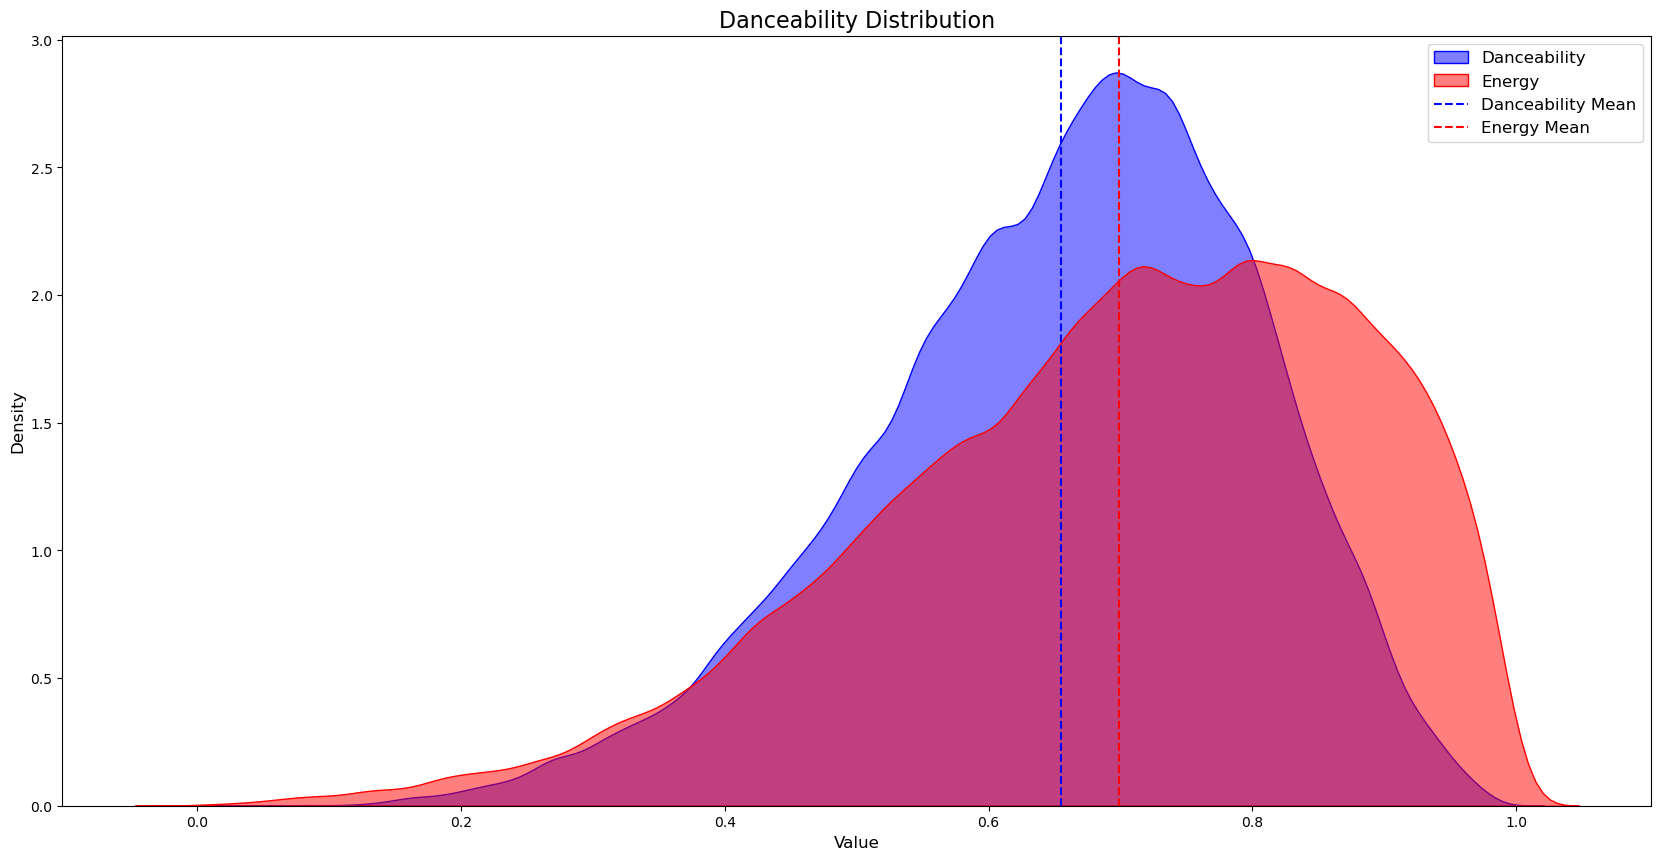

In [55]:
# plot Danceability Distribution
plt.figure(figsize=(20.5, 10))
sns.kdeplot(df['danceability'], shade=True, label='Danceability', color='blue', alpha=0.5, bw_adjust=0.7) # alphs .5 means semi transparent
sns.kdeplot(df['energy'], shade=True, label='Energy', color='red', alpha=0.5, bw_adjust=0.7)
plt.axvline(df['danceability'].mean(), color='blue', linestyle='--', label='Danceability Mean')  # axv use to draw verticle line
plt.axvline(df['energy'].mean(), color='red', linestyle='--', label='Energy Mean')
plt.title('Danceability Distribution', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(False)
plt.show()

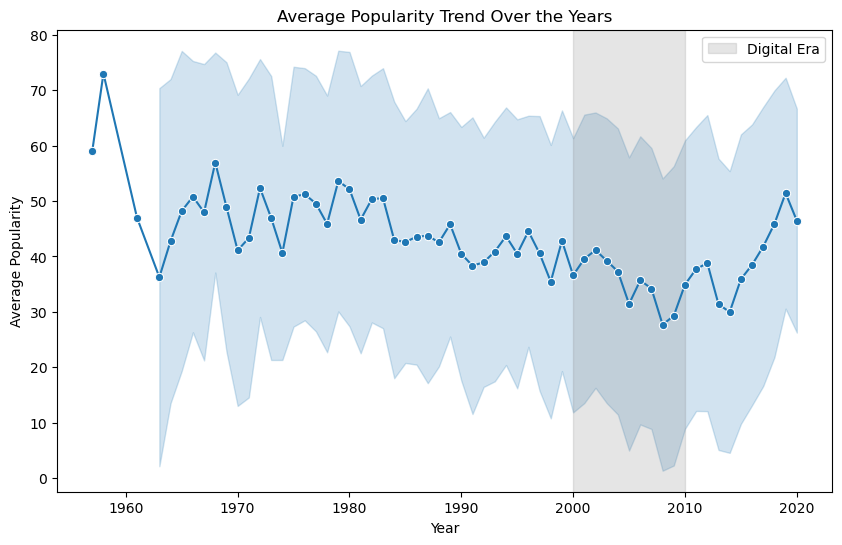

In [57]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='track_popularity', data=data, ci='sd', marker='o')
plt.axvspan(2000, 2010, color='gray', alpha=0.2, label='Digital Era')
plt.title('Average Popularity Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.legend()
plt.grid(False)
plt.show()

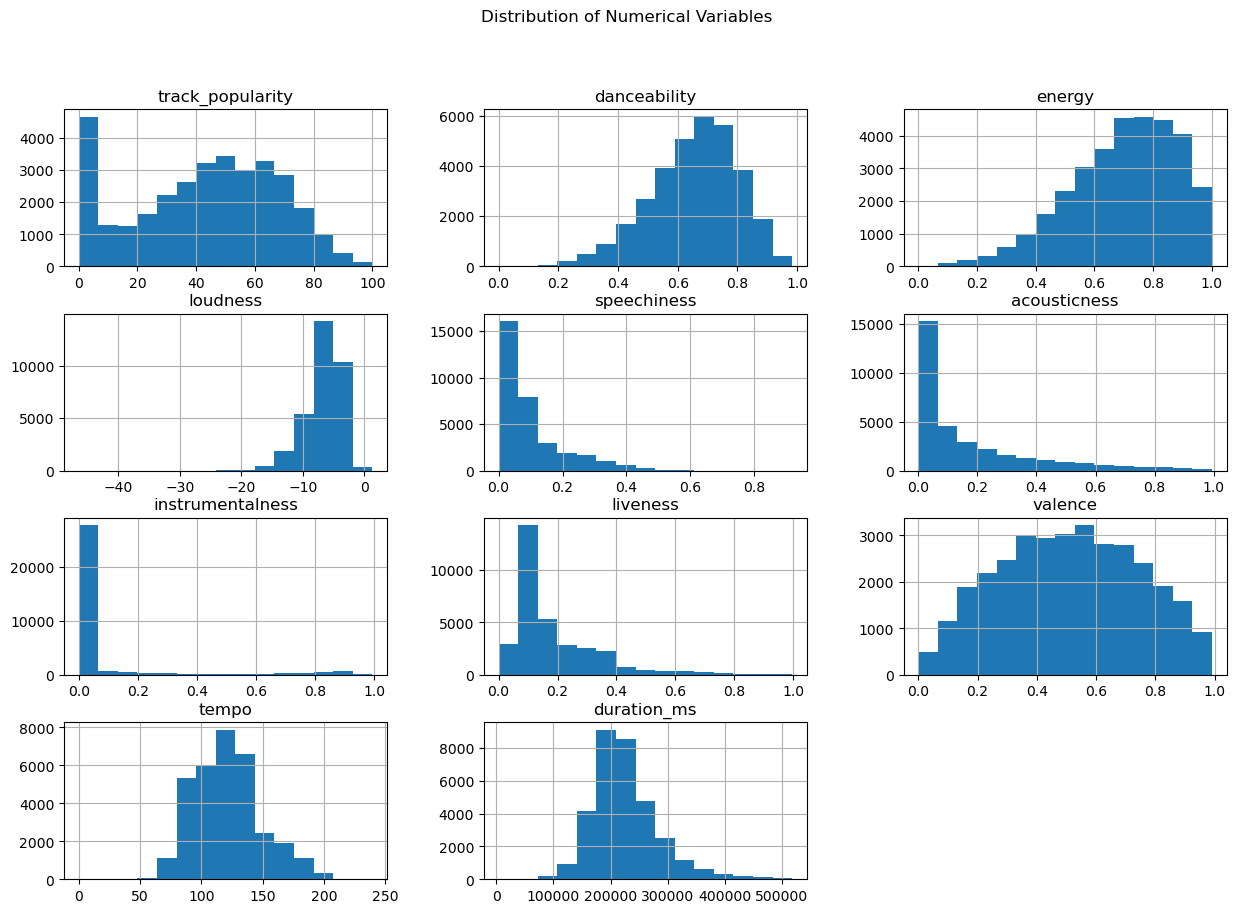


playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

track_artist
Martin Garrix                161
Queen                        136
The Chainsmokers             123
David Guetta                 110
Don Omar                     102
Drake                        100
Dimitri Vegas & Like Mike     93
Calvin Harris                 91
Hardwell                      84
Kygo                          83
Name: count, dtype: int64


In [59]:
numerical_columns = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

# Frequency of categorical variables
print()
print(df['playlist_genre'].value_counts())

# Top 10 most frequent artists
print()
print(df['track_artist'].value_counts().head(10)) 


In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Splitting the dataset into training and testing
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

In [63]:
train_data.shape,test_data.shape

((24624, 23), (8209, 23))

# model recommendation using  nearest nighbour knn

In [ ]:
Part 4 - Matrix interaction¶
What is an Interaction Matrix?
An interaction matrix is a core concept in recommendation systems, particularly those based on Collaborative Filtering. It is a table (or matrix) that captures the relationships between two sets of entities, such as users and items (e.g., songs, movies, products), in a format that can be processed by recommendation algorithms.

An interaction matrix is a matrix where:

Rows represent one set of entities, typically users.
Columns represent another set of entities, typically items (such as songs, movies, or products).
Entries in the matrix indicate the interaction between a user and an item.
These interactions can be:

Explicit: Where users provide direct feedback, such as ratings for a movie (e.g., 1 to 5 stars).
Implicit: Where the interaction is inferred from user behavior, such as the number of times a song was played, whether a product was purchased, or if an item was viewed.
Example
Consider an example of an interaction matrix for a music recommendation system:

User \ Track	Track 1	Track 2	Track 3	Track 4
User 1	5	0	3	0
User 2	0	2	0	4
User 3	1	0	5	3
Here:

User 1 rated Track 1 with a 5, Track 3 with a 3, and did not rate Tracks 2 or 4.
User 2 rated Track 2 with a 2, and Track 4 with a 4, and did not rate Tracks 1 or 3.
User 3 rated Track 1 with a 1, Track 3 with a 5, and Track 4 with a 3, and did not rate Track 2.
Usage
Recommendation: The interaction matrix is used by recommendation algorithms to predict which items (songs, movies, etc.) a user might like based on the interactions of other users with similar items.

Collaborative Filtering: This type of recommendation system uses the interaction matrix to identify patterns and similarities between users (User-based Collaborative Filtering) or between items (Item-based Collaborative Filtering).

Construction of the Matrix¶
      To construct an interaction matrix in Python, you can use the pivot function from pandas, as shown below:

Conclusion
An interaction matrix is a foundational component of many recommendation systems, as it summarizes the relationships between users and items in a structure that can be easily analyzed to generate personalized recommendations.

                                                                                                                                                                                             
                                                                                                                                                                                                   

In [66]:
# Converting to numpy matrix interaction_matrix_matrix = interaction_matrix.values
interaction_matrix = train_data.pivot_table(index='playlist_id', columns='track_id', values='track_popularity').fillna(0) 

In [ ]:
Part 5 - Finding the value of K


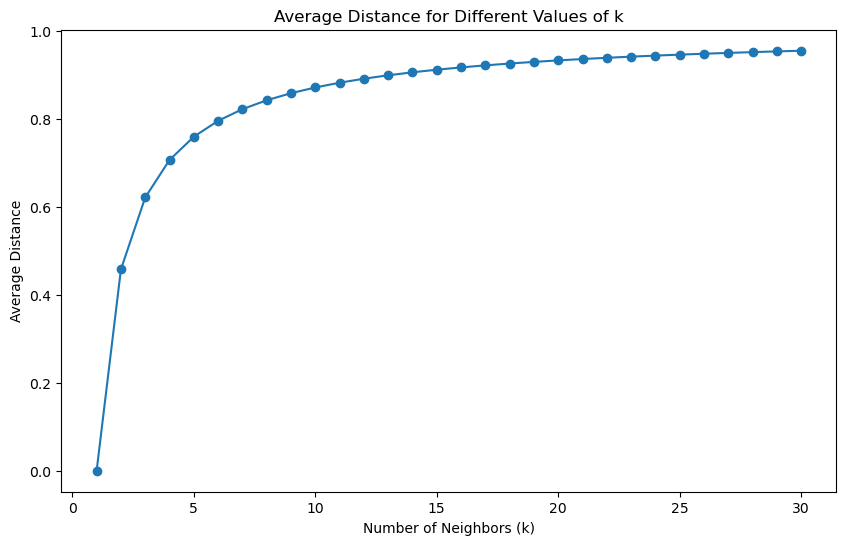

Best value of k: 1


In [70]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

# List of k values to test
k_values = list(range(1, 31))

# Metric to store the results
mean_distances = []

# Loop to find the best k
for k in k_values:
    model = NearestNeighbors(n_neighbors=k, metric='cosine')
    model.fit(interaction_matrix)
    
    # Compute the distances and indices of the nearest neighbors
    distances, indices = model.kneighbors(interaction_matrix)
    
    # Calculate the average distance to the nearest neighbors
    mean_distance = np.mean(distances)
    mean_distances.append(mean_distance)

# Plotting the average distance metric for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_distances, marker='o')
plt.title('Average Distance for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Distance')
plt.grid(False)
plt.show()

# Find the best k (the one that minimizes the average distance)
best_k = k_values[np.argmin(mean_distances)]
print(f"Best value of k: {best_k}")

In [ ]:
Part 6 - Machine learning Collaborative Filtering-Based Recommendation Model¶
Defi

In [72]:
# Adjusting k to test a larger value 
model = NearestNeighbors(n_neighbors=best_k, metric='cosine')
model.fit(interaction_matrix)

NearestNeighbors(metric='cosine', n_neighbors=1)

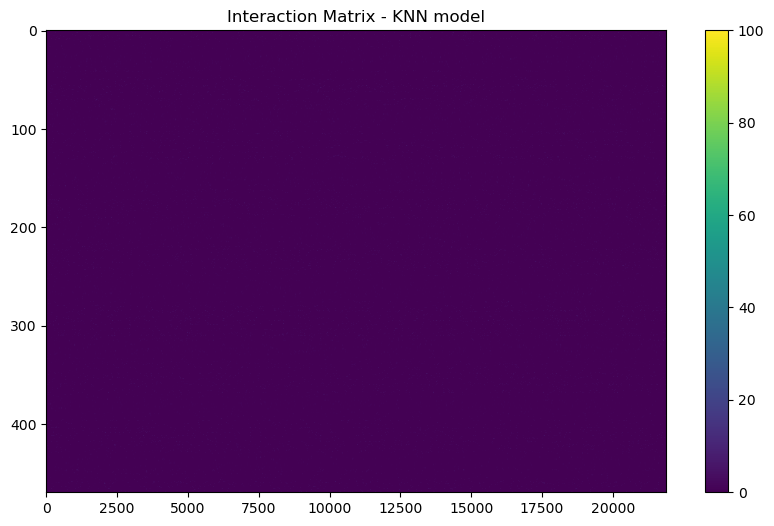

In [74]:
# Plotting the Interaction Matrix
plt.figure(figsize=(10, 6))
plt.imshow(interaction_matrix, aspect='auto', cmap='viridis')
plt.title('Interaction Matrix - KNN model')
plt.colorbar()
plt.show()

In [ ]:
Part 7 - Making recommendation¶

In [76]:
default_song_name = "Someone You Loved - Future Humans Remix"

def recommend_songs(df, model, interaction_matrix, song_name=default_song_name, k=10):
    # Find playlists containing the given song
    song_rows = df[df['track_name'].str.contains(song_name, case=False, na=False)]
    if song_rows.empty:
        print("Song not found in the dataset.")
        return

    playlist_id = song_rows['playlist_id'].values[0]  # First playlist containing the song
    unique_playlists = df['playlist_id'].unique()

    if playlist_id not in unique_playlists:
        print("Playlist not found.")
        return

    playlist_index = list(unique_playlists).index(playlist_id)  # Get its index

    try:
        # Use iloc if interaction_matrix is DataFrame
        input_vector = interaction_matrix.iloc[playlist_index].values if isinstance(interaction_matrix, pd.DataFrame) else interaction_matrix[playlist_index]
        distances, indices = model.kneighbors(input_vector.reshape(1, -1), n_neighbors=k+1)
    except:
        print("Error finding similar playlists.")
        return

    similar_indices = indices.flatten()[1:]  # Exclude the input playlist
    original_tracks = set(df[df['playlist_id'] == playlist_id]['track_id'])
    recommended_tracks = set()

    for idx in similar_indices:
        sim_playlist_id = unique_playlists[idx]
        sim_tracks = set(df[df['playlist_id'] == sim_playlist_id]['track_id'])
        recommended_tracks |= (sim_tracks - original_tracks)  # Add new songs only

    if recommended_tracks:
        rec_info = df[df['track_id'].isin(recommended_tracks)][['track_name', 'track_artist']].drop_duplicates()
        print("🎵 Recommended Songs:")
        print(rec_info)
    else:
        print("No new songs to recommend.")

# Example usage:
print("Selected Song:", default_song_name)
recommend_songs(df, model, interaction_matrix)


Selected Song: Someone You Loved - Future Humans Remix
🎵 Recommended Songs:
                       track_name               track_artist
499            Break the Distance                      ELYAZ
500      I Could Get Used To This                 Becky Hill
501                       Therapy           Armin van Buuren
502                      Sunshine               David Guetta
503    Giant - Robin Schulz Remix              Calvin Harris
...                           ...                        ...
29026                     Turn Up  Dimitri Vegas & Like Mike
29027                 Ahura Mazda                  Sharp Man
29028                      Access                        TBR
29029                  Back Again                  Bullistik
29030                      Anthem               Michael June

[719 rows x 2 columns]


# Part 9 - Recommendation system - Group songs into clusters based on their characteristics and recommend songs within these clusters
# A Recommendation System is an algorithmic tool that suggests items to users based on various c

In [78]:
# 1. Select the relevant features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

X = data[features]

In [80]:
# Scaling data
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Viewing
scaler

StandardScaler()

In [ ]:
Number of Clusters
Number of Clusters refers to the number of distinct groups or segments identified within a dataset when performing cluster analysis. Clustering is a technique used in data analysis and machine learning to group similar data points together based on certain characteristics or features.

In More Detail:

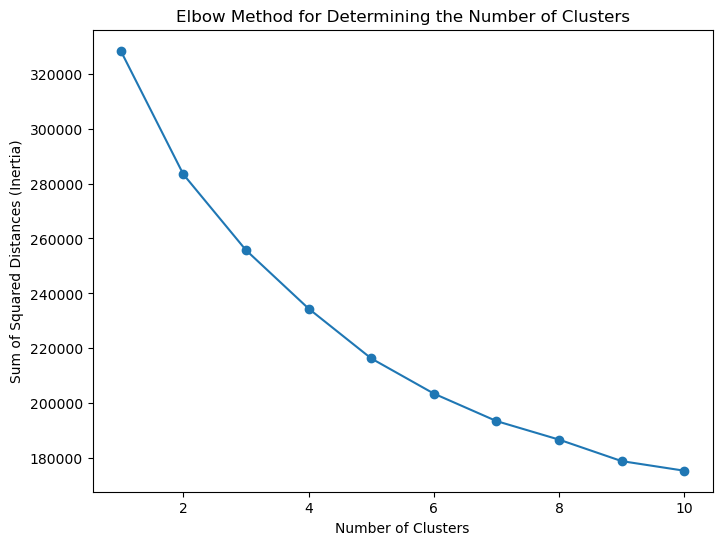

In [82]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Determining the Number of Clusters')
plt.grid(False)
plt.show()

In [84]:
# 4. Apply K-Means with the chosen number of clusters
# Assume the optimal number of clusters is 5 (adjust as per the elbow plot)
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster_kmeans'] = kmeans.fit_predict(X_scaled)
kmeans

KMeans(n_clusters=4, random_state=42)

In [86]:
# Viewing total cluster
data.cluster_kmeans.value_counts()

cluster_kmeans
0    13970
2    10837
1     5418
3     2608
Name: count, dtype: int64

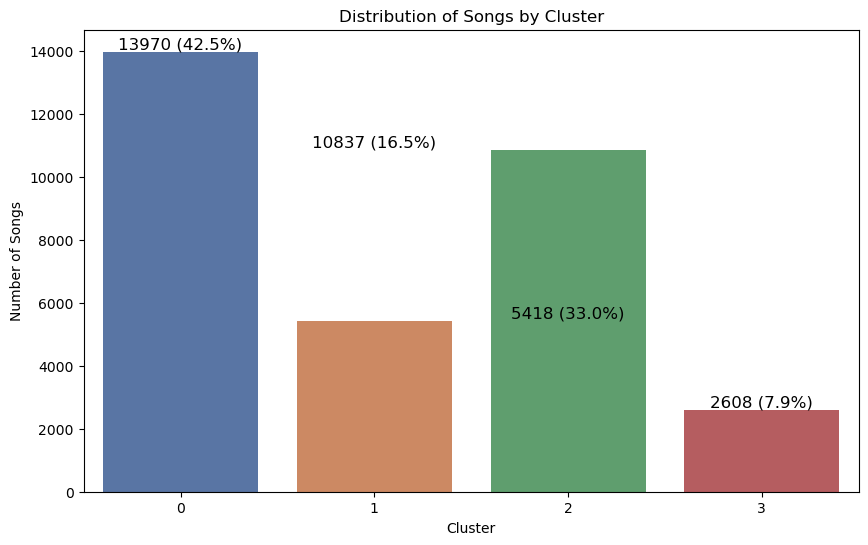

In [90]:
# Count of songs in each cluster
cluster_counts = data['cluster_kmeans'].value_counts().sort_values(ascending=False)

# Calculate the percentage of each cluster
total_songs = cluster_counts.sum()
cluster_percentages = (cluster_counts / total_songs) * 100

# Plot the distribution of clusters with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='deep')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs by Cluster')

# Adding data labels on top of bars
for index, value in enumerate(cluster_counts):
    plt.text(index, value + 100, f'{value} ({cluster_percentages[index]:.1f}%)', ha='center', fontsize=12)

plt.grid(False)
plt.show()

In [ ]:
Part 9.1 - PCA
Applying Principal Component Analysis (PCA) in a recommendation system can be beneficial for several reasons, particularly when dealing wit

In [92]:
from sklearn.decomposition import PCA

# 2. Perform PCA Analysis
# Initialize the PCA model specifying the number of components to reduce to (in this case, 2 components).
pca = PCA(n_components=2)

# Apply PCA on the scaled feature set X_scaled and transform the data into the new 2-dimensional space.
X_pca = pca.fit_transform(X_scaled)

# Output the PCA model object, which contains information such as the amount of variance explained by each principal component.
pca

PCA(n_components=2)

In [ ]:
10  cluster visualization

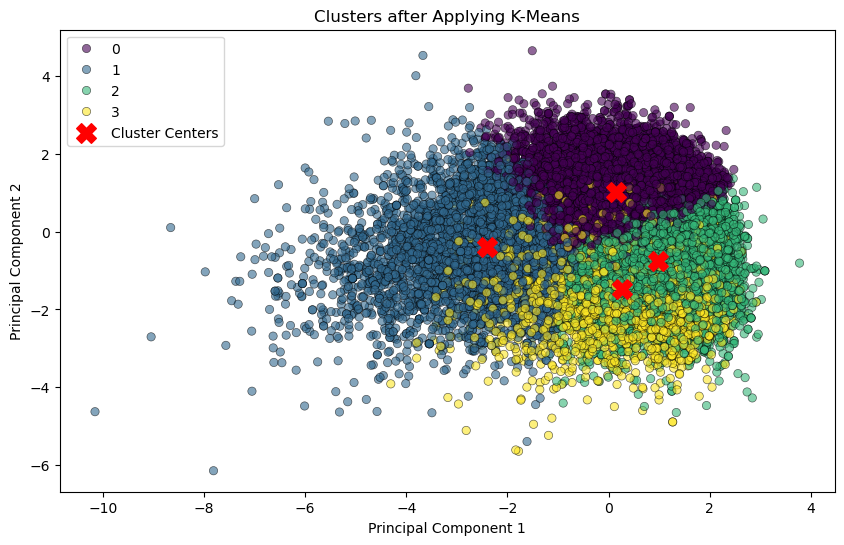

In [94]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['cluster_kmeans'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], 
                y=X_pca[:, 1], 
                hue=data['cluster_kmeans'], 
                palette='viridis', 
                alpha=0.6, 
                edgecolor='k')

# Adding the cluster centers
centers = kmeans.cluster_centers_
# Projecting the centers to the 2D PCA space
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
            c='red', 
            s=200, 
            marker='X', 
            label='Cluster Centers')

plt.title('Clusters after Applying K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(False)
plt.show()


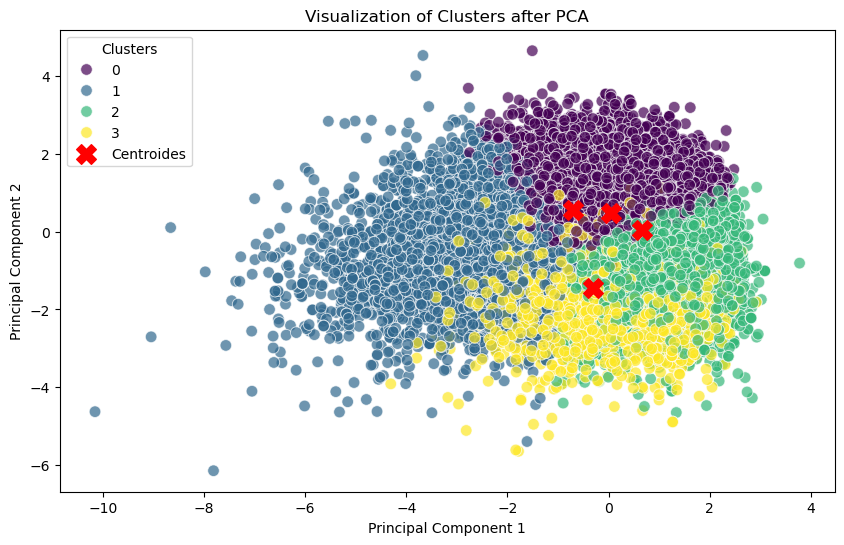

In [96]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['cluster_kmeans'], palette='viridis', s=70, alpha=0.7)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroides')

plt.title('Visualization of Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.grid(False)
plt.show()

In [ ]:
Making Recommendation - Cluster Mode

In [98]:
def recommend_songs_by_cluster_kmeans(song_name, data):
    # Search for the selected song in the dataset, ignoring case and handling missing values
    selected_song = data[data['track_name'].str.contains(song_name, case=False, na=False)]
    
    # If the song is not found, display a message and exit the function
    if selected_song.empty:
        print("Song not found.")
        return None
    
    # Retrieve the cluster to which the selected song belongs
    cluster = selected_song['cluster_kmeans'].values[0]
    
    # Find all songs that belong to the same cluster as the selected song
    recommended_songs = data[data['cluster_kmeans'] == cluster]
    
    # Exclude the selected song from the recommendations
    recommended_songs = recommended_songs[recommended_songs['track_name'] != selected_song['track_name'].values[0]]
    
    # Return only the 'track_name' and 'track_artist' columns, limited to the top 25 recommendations
    return recommended_songs[['track_name', 'track_artist']].head(30)
# Example of usage

In [100]:
# Example of usage
# Replace with the name of the song you want to use as the base for recommendations
song_name = "Shape of You"  
top_recommendations_kmeans = recommend_songs_by_cluster_kmeans(song_name, data)

# If recommendations are found, print them
if top_recommendations_kmeans is not None:
    print("Recommended music")
    print(top_recommendations_kmeans)

Recommended music
                                           track_name        track_artist
0   I Don't Care (with Justin Bieber) - Loud Luxur...          Ed Sheeran
1                     Memories - Dillon Francis Remix            Maroon 5
4             Someone You Loved - Future Humans Remix       Lewis Capaldi
5   Beautiful People (feat. Khalid) - Jack Wins Remix          Ed Sheeran
10  Cross Me (feat. Chance the Rapper & PnB Rock) ...          Ed Sheeran
12                                         Body On My         Loud Luxury
15  South of the Border (feat. Camila Cabello & Ca...          Ed Sheeran
17  Say My Name (feat. Bebe Rexha & J Balvin) - Lu...        David Guetta
18  Dancing With A Stranger (With Normani) - Cheat...           Sam Smith
21     All Around The World (La La La) - Marnik Remix               R3HAB
23       Slow Dance (feat. Ava Max) - Sam Feldt Remix         AJ Mitchell
29            When You Leave - Breathe Carolina Remix        Nikki Vianna
32                  